# NFL Birthday Analysis
I am currently in the SMU Masters Data Science Program and we discussing a topic on observational vs experimental studies, and one of the studies we were analyzing was : 

[Brewer, L. M., and Cochran, J. J.(June 2013), "August’s Child Is...Favoured by Fortune."](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2013.00661.x)

![](http://www.americanfootballzone.com/wp-content/uploads/2016/12/Terrell-Owens-Best-Celebrations-Happy-Birthday-TO-Celebration-Station-NFL-NOW.jpg)

In [102]:
# scrapper 
import requests
from bs4 import BeautifulSoup
import json
import re

import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

## Grab NFL Birthday Data

In [88]:
def birthday_grabber(month):
    birthday = []
    for day in range(1,32):
        url = 'https://www.pro-football-reference.com/friv/birthdays.cgi?month={}&day={}'.format(month, day)
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')

        tbody = soup.find_all('tbody')
        bday = [[td.getText() for td in tbody[i].find_all(['th', 'td'])] for i in range(len(tbody))]
        bday = bday[0]

        try:
            td_counter = 0
            row = []
            for td in bday:
                if td_counter < 26:
                    row.append(td)
                    td_counter += 1
                elif td_counter == 26:
                    row.append(td)
                    birthday.append(row)
                    row = []
                    td_counter = 0
        except Exception as e: print(e)

    return birthday

In [96]:
df = {}
for month in range(1, 13):
    table = birthday_grabber(month)
    temp = pd.DataFrame(table)
    temp['month'] = month
    df[month] = temp
new_df = pd.concat(df.values())

In [105]:
col = ['rank_row', 'player', 'position', 'born', 'from', 'to','ap1', 'pb', 'st', 'car_av', 'games','pass_comp', 
       'pass_att', 'pass_yds','pass_td', 'pass_lng', 'int','sk', 'sk_yds', 
       'run_att', 'run_yds', 'run_td', 'run_long', 'rec_rec', 'rec_yds', 'rec_td','rec_lng', 'month'
      ]
new_df.columns = col

In [108]:
new_df.head()

,rank_row,player,position,born,from,to,ap1,pb,st,car_av,...,sk_yds,run_att,run_yds,run_td,run_long,rec_rec,rec_yds,rec_td,rec_lng,month
0,1,Grady Allen,LB,1946,1968,1972,0,0,3,21,...,,,,,,,,,,1
1,2,Ralph Anderson,E,1937,1958,1960,0,0,2,7,...,,,,,,55,791,6,46,1
2,3,Teddy Andrulewicz,WB,1905,1930,1930,0,0,0,0,...,,,,,,0,0,1,0,1
3,4,Justin Armour,WR,1973,1995,1999,0,0,1,7,...,0,4,-5,0,6,64,861,7,54,1
4,5,Marvin Austin,DL,1989,2012,2014,0,0,0,2,...,,,,,,,,,,1


In [109]:
new_df.to_csv('nfl_birthdays.csv')

## Birthday Analysis

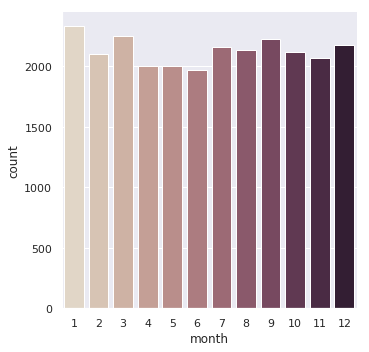

In [111]:
sns.catplot(x="month", kind="count", palette="ch:.25", data=new_df);